# Data Pre-processing

In [1]:
import pandas as pd
import numpy as np

In [2]:
jamstones_df = pd.read_csv('jamstones.csv')

### Filter the relevant column for processing

In [3]:
jamstones_df['processed_at'] = pd.to_datetime(jamstones_df['processed_at']).dt.date

In [5]:
items_dates_df = jamstones_df[['line_items', 'processed_at']]
items_dates_df.head()

,line_items,processed_at
0,"[{'id': 10556246884448, 'admin_graphql_api_id'...",2021-12-28
1,"[{'id': 10556197765216, 'admin_graphql_api_id'...",2021-12-28
2,"[{'id': 10555527856224, 'admin_graphql_api_id'...",2021-12-27
3,"[{'id': 10555457470560, 'admin_graphql_api_id'...",2021-12-27
4,"[{'id': 10555303166048, 'admin_graphql_api_id'...",2021-12-27


In [8]:
from datetime import date

In [22]:
today_date = date.today()

In [36]:
def get_filtered_data(df, past_days):
    print(today_date)
    print(df["processed_at"].iloc[1])
    
    filtered_df = df.loc[(today_date - df["processed_at"]).dt.days <= past_days]
    return filtered_df

In [38]:
filtered_df = get_filtered_data(items_dates_df, 30)
filtered_df

2022-01-27
2021-12-28


,line_items,processed_at
0,"[{'id': 10556246884448, 'admin_graphql_api_id'...",2021-12-28
1,"[{'id': 10556197765216, 'admin_graphql_api_id'...",2021-12-28


In [15]:
for index, row in items_dates_df.head().iterrows():
    print(row[1])
    today_date = date.today()
    print(today_date)
    difference = today_date - row[1]
    print(type(difference))
    print(difference.days)
    print("=====================")


2021-12-28
2022-01-27
<class 'datetime.timedelta'>
30
2021-12-28
2022-01-27
<class 'datetime.timedelta'>
30
2021-12-27
2022-01-27
<class 'datetime.timedelta'>
31
2021-12-27
2022-01-27
<class 'datetime.timedelta'>
31
2021-12-27
2022-01-27
<class 'datetime.timedelta'>
31


### Import necessary packages

In [5]:
import ast

# Generate data for Top Sales (in terms of quantity) by Product

### Helper function for data preprocessing

In [6]:
def clean_words(title):
    remove = False
    clean_title = ""
    for char in title:
        if char == "[" or char == "(":
            remove = True
        elif char == "]" or char == ")":
            remove = False
        elif char == "*" and remove == False:
            remove = True
        elif char == "*" and remove == True:
            remove = False

        if remove == False:
            if char == " " and len(clean_title) > 0 and clean_title[-1] != " ":
                clean_title += char
            elif char not in ["]", ")", "*", " "]:
                clean_title += char
    return clean_title

### Loop through transactions to compile total sales (quantity) for each product

In [7]:
product_quantity_dict = {}

for index, row in line_items_df.iterrows():
    if type(row[0]) is not None and type(row[0]) is str:
        data = ast.literal_eval(row[0])
        for purchase in data:
            title = purchase["title"]
            new_title = clean_words(title).lstrip(" ").rstrip(" ")
            if "Testing" not in new_title and "Live Sale" not in new_title:
                if new_title not in product_quantity_dict:
                    product_quantity_dict[new_title] = int(purchase["quantity"])
                else:
                    product_quantity_dict[new_title] += int(purchase["quantity"])

In [8]:
product_quantity_df = pd.DataFrame.from_dict(product_quantity_dict, orient='index', columns=['quantity'])
product_quantity_df.sort_values(by='quantity', ascending=False, inplace=True)

In [9]:
product_quantity_df.head(10)

,quantity
Solitaire Crystal Necklace,320
Amethyst Eye Pillow,308
2022 ZODIAC Crystal Bag Charm,275
Healing Crystal Tree,226
Wealth Magnet Bottle,208
Mermaid Dream Crystal Earrings,199
Rose Gold Bag Charm,198
DAINTY Bracelets,191
Crystal Magical Unicorn,186
Wealth Money Bag Crystal Resin,166


In [10]:
top_product_quantity_df = product_quantity_df.head(10)

<AxesSubplot:>

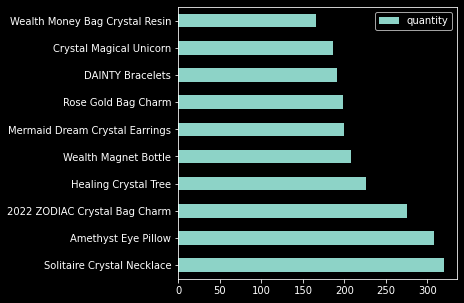

In [11]:
top_product_quantity_df.plot.barh(y='quantity', figsize=(5, 5))

In [17]:
top_dict = top_product_quantity_df.to_dict()
top_quantitiy_dict = top_dict["quantity"]
x = list(top_quantitiy_dict.keys())
y = list(top_quantitiy_dict.values())

In [18]:
x

['Solitaire Crystal Necklace',
 'Amethyst Eye Pillow',
 '2022 ZODIAC Crystal Bag Charm',
 'Healing Crystal Tree',
 'Wealth Magnet Bottle',
 'Mermaid Dream Crystal Earrings',
 'Rose Gold Bag Charm',
 'DAINTY Bracelets',
 'Crystal Magical Unicorn',
 'Wealth Money Bag Crystal Resin']

In [19]:
y

[320, 308, 275, 226, 208, 199, 198, 191, 186, 166]